<a href="https://colab.research.google.com/github/prateekbps/DataScience/blob/main/Finance_Domain_(Cross_Val%2C_RF%2C_Feature_Selection%2C_Imbalanced_Target12_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [2]:
# data exploration
company = pd.read_csv('/content/drive/MyDrive/ML Project Data/Finance Domain/Company data.csv')

In [3]:
company.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17
2,3,92.2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,...,5.07,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76
3,4,2.7,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN
4,5,109.0,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,...,9.46,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN


In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541 entries, 0 to 3540
Data columns (total 52 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          3541 non-null   int64  
 1   Networth Next Year                           3541 non-null   float64
 2   Total assets                                 3541 non-null   float64
 3   Net worth                                    3541 non-null   float64
 4   Total income                                 3343 non-null   float64
 5   Change in stock                              3083 non-null   float64
 6   Total expenses                               3402 non-null   float64
 7   Profit after tax                             3410 non-null   float64
 8   PBDITA                                       3410 non-null   float64
 9   PBT                                          3410 non-null   float64
 10  

In [5]:
# data cleaning
# fixing column names(containing the spaces)
company.columns = company.columns.str.replace(r'\s+', '_', regex=True).str.replace('(','').str.replace(')','').str.replace('%','perc').str.replace('/','_to_')

In [6]:
print("The number of rows (observation) is", company.shape[0],'\n' , 'The num of columns (variable) is', company.shape[1])

The number of rows (observation) is 3541 
 The num of columns (variable) is 52


In [7]:
# Checking basic measures of descriptive statistics for the continuosu variables
company.describe()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
count,3541.000000,3541.000000,3.541000e+03,3541.000000,3.343000e+03,3083.000000,3.402000e+03,3410.00000,3410.000000,3410.000000,...,3213.000000,2801.000000,2901.000000,3180.000000,2.849000e+03,2849.000000,3541.000000,3541.000000,3.541000e+03,1347.000000
mean,1772.451567,1616.256199,3.443382e+03,1295.862214,4.582823e+03,41.489264,4.262931e+03,277.36044,578.056305,383.810088,...,17.041261,87.078725,27.930469,19.088399,2.206739e+07,-1333.698175,-220.316436,-221.512285,3.443382e+03,63.905687
std,1023.731393,17459.639673,3.097089e+04,13387.891867,5.568124e+04,440.573761,5.302869e+04,3064.40606,5653.770427,4117.069953,...,83.943754,598.545835,151.042868,376.340737,1.655193e+08,37500.729972,14261.946209,14261.923760,3.097089e+04,1433.809532
min,1.000000,-74265.600000,1.000000e-01,0.000000,0.000000e+00,-3029.400000,-1.000000e-01,-3908.30000,-440.700000,-3894.800000,...,0.000000,-0.090000,-0.180000,-2.000000,-2.147484e+09,-999998.900000,-843181.820000,-843181.820000,1.000000e-01,-1116.640000
25%,886.000000,31.700000,9.130000e+01,31.300000,1.064500e+02,-1.800000,9.582500e+01,0.50000,6.900000,0.700000,...,3.760000,8.200000,5.100000,2.990000,1.316250e+06,10.000000,0.000000,0.000000,9.130000e+01,3.275000
50%,1773.000000,116.300000,3.097000e+02,102.300000,4.449000e+02,1.600000,4.077000e+02,8.80000,35.400000,12.400000,...,6.320000,17.270000,9.760000,6.400000,4.672063e+06,10.000000,1.430000,1.180000,3.097000e+02,9.100000
75%,2658.000000,456.100000,1.098700e+03,377.300000,1.440900e+03,18.050000,1.359775e+03,52.27500,150.250000,71.975000,...,11.680000,40.350000,20.240000,11.845000,1.065197e+07,10.000000,9.620000,7.480000,1.098700e+03,17.790000
max,3545.000000,805773.400000,1.176509e+06,613151.600000,2.442828e+06,14185.500000,2.366035e+06,119439.10000,208576.500000,145292.600000,...,3135.200000,17947.600000,5651.400000,21092.000000,4.130401e+09,100000.000000,34522.530000,34522.530000,1.176509e+06,51002.740000


In [8]:
# creating a binary target variable using "Networth next year"
company['default'] = np.where(company['Networth_Next_Year']>0,1,0)

In [9]:
company.head()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE,default
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31,1
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17,1
2,3,92.2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,...,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76,1
3,4,2.7,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN,1
4,5,109.0,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,...,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN,1


In [10]:
company[['default', 'Networth_Next_Year']]

,default,Networth_Next_Year
0,1,8890.6
1,1,394.3
2,1,92.2
3,1,2.7
4,1,109.0
...,...,...
3536,1,226.4
3537,1,89.4
3538,1,246.2
3539,1,146.9


In [11]:
company['default'].value_counts()

,count
default,
1,3298
0,243


In [12]:
company['default'].value_counts(normalize=True)

,proportion
default,
1,0.931375
0,0.068625


In [13]:
company.size

187673

In [14]:
company.isnull().sum()

,0
Num,0
Networth_Next_Year,0
Total_assets,0
Net_worth,0
Total_income,198
Change_in_stock,458
Total_expenses,139
Profit_after_tax,131
PBDITA,131
PBT,131


In [15]:
company.isnull().sum().sum()

18533

In [16]:
company_x = company.drop('default',axis=1)
company_y = company['default']

In [17]:
company_x.head(1)

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.1,17512.3,27.31


In [18]:
company_y.head(2)

,default
0,1
1,1


In [19]:
# handling missing value- required
# encoing-> not required
# outlier treatment- required
# feature scaling - required
# imbalance treatment - required
company_x.duplicated().sum()

0

In [20]:
# lets check the number of outliers per column
Q1 = company_x.quantile(0.25)
Q3 = company_x.quantile(0.75)
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [21]:
LL

,0
Num,-1.772000e+03
Networth_Next_Year,-6.049000e+02
Total_assets,-1.419800e+03
Net_worth,-4.877000e+02
Total_income,-1.895225e+03
Change_in_stock,-3.157500e+01
Total_expenses,-1.800100e+03
Profit_after_tax,-7.716250e+01
PBDITA,-2.081250e+02
PBT,-1.062125e+02


In [22]:
# feature wise outliers
((company_x>UL) | (company_x<LL)).sum()

,0
Num,0
Networth_Next_Year,506
Total_assets,484
Net_worth,499
Total_income,427
Change_in_stock,621
Total_expenses,432
Profit_after_tax,577
PBDITA,483
PBT,576


In [23]:
# hanlding outlier and missing values
company_x[((company_x > UL) | (company_x < LL))] = np.nan

In [24]:
 ((company_x>UL) | (company_x<LL)).sum()

,0
Num,0
Networth_Next_Year,0
Total_assets,0
Net_worth,0
Total_income,0
Change_in_stock,0
Total_expenses,0
Profit_after_tax,0
PBDITA,0
PBT,0


In [25]:
company_x.isnull().sum().sum()

39981

In [26]:
company_x.isnull().sum()/len(company_x)*100

,0
Num,0.000000
Networth_Next_Year,14.289749
Total_assets,13.668455
Net_worth,14.092064
Total_income,17.650381
Change_in_stock,30.471618
Total_expenses,16.125388
Profit_after_tax,19.994352
PBDITA,17.339735
PBT,19.966111


In [27]:
# Dealing iwth variables haing more than 20% missing data
company_x = company_x.drop(['Num','Networth_Next_Year'], axis=1)

In [28]:
company_x.shape

(3541, 50)

In [29]:
company_sub1 = pd.concat([company_x, company_y], axis=1)

In [30]:
company_sub1.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE,default
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.46,...,NaN,21.78,7.71,NaN,10.0,NaN,7.10,NaN,27.31,1
1,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,NaN,158.6,18.53,...,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17,1
2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,0.3,1.22,...,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76,1
3,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN,1
4,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,11.9,1.96,...,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN,1


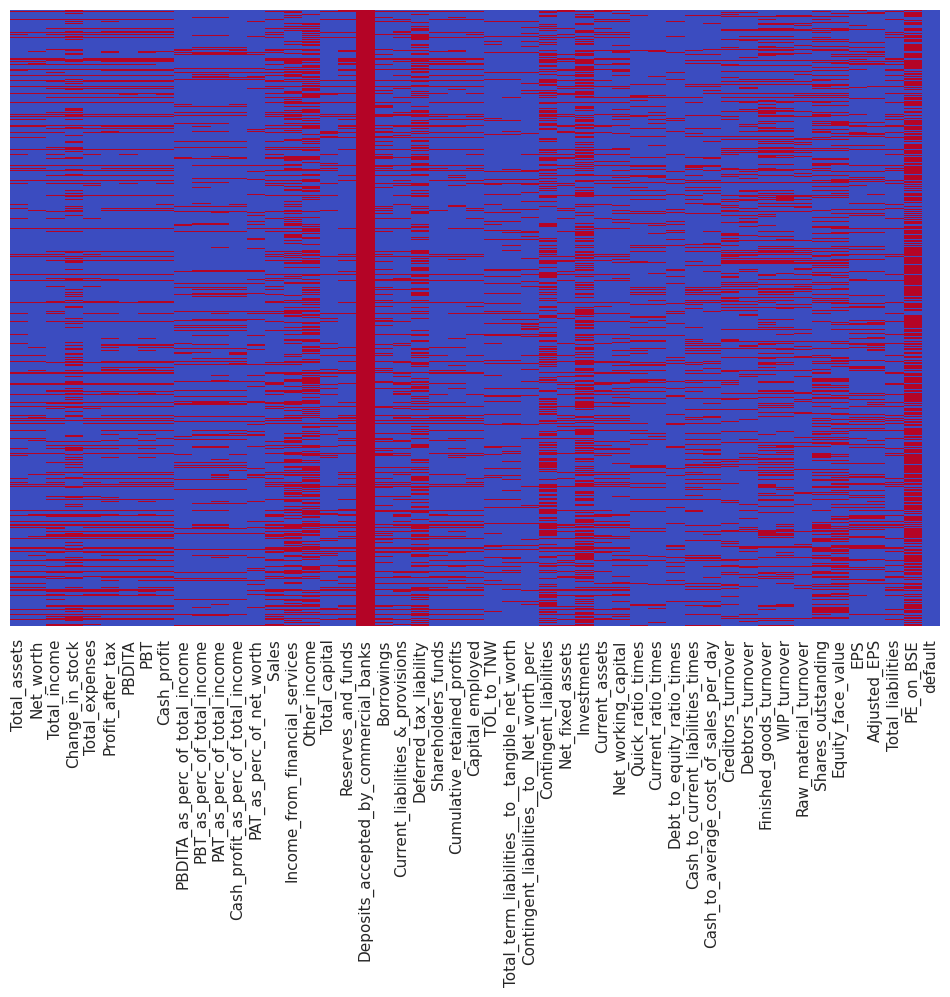

In [31]:
# lets visually inspect the missing values in our data
plt.figure(figsize=(12,8))
sns.heatmap(company_sub1.isnull(),cbar=False, cmap='coolwarm', yticklabels=False)
plt.show()

In [32]:
# isnpecting total missing values by each row
company_sub1.isnull().sum(axis=1)

,0
0,30
1,3
2,3
3,23
4,3
...,...
3536,5
3537,7
3538,2
3539,7


In [33]:
# Row wise missing data analysis , if row wise we are getting more than 255 missing data we can drop it
company_sub1.shape

(3541, 51)

In [34]:
(51*25)/100

12.75

In [35]:
company_sub1_temp =  company_sub1[company_sub1.isnull().sum(axis=1) <=12]

In [36]:
company_sub1_temp.shape

(2396, 51)

In [37]:
company_sub1_temp['default'].value_counts(normalize=True)

,proportion
default,
1,0.961603
0,0.038397


In [38]:
# we would reject company_sub1_temp --> dropping this much data is not practical so rejecting this and keepoiing original concat data

In [39]:
company_sub1.isnull().sum().sort_values(ascending=False)/len(company_sub1)*100

,0
Deposits_accepted_by_commercial_banks,100.000000
PE_on_BSE,67.636261
Investments,50.833098
Other_income,45.523863
Contingent_liabilities,42.784524
Deferred_tax_liability,41.541937
Income_from_financial_services,38.604914
Equity_face_value,31.855408
Shares_outstanding,30.641062
Change_in_stock,30.471618


In [40]:
"""
Income_from_financial_services                     38.604914 - ok
Equity_face_value                                  31.855408 - can i take this one
Shares_outstanding                                 30.641062 - can i take this one
Change_in_stock                                    30.471618 - can i take this one
Finished_goods_turnover                            30.104490 - can i take this one
WIP_turnover - can i take this one

"""

'\nIncome_from_financial_services                     38.604914 - ok\nEquity_face_value                                  31.855408 - can i take this one\nShares_outstanding                                 30.641062 - can i take this one\nChange_in_stock                                    30.471618 - can i take this one\nFinished_goods_turnover                            30.104490 - can i take this one\nWIP_turnover - can i take this one\n\n'

In [41]:
# Dropping columns with more than 25% missing value
company_sub2 = company_sub1.drop(['Deposits_accepted_by_commercial_banks','PE_on_BSE','Investments','Other_income',
                                 'Contingent_liabilities','Deferred_tax_liability',
                                  'Income_from_financial_services'], axis=1)

In [42]:
company_sub2.shape

(3541, 44)

In [43]:
# Segregate the predictors and response
predictors = company_sub2.drop(['default'], axis=1)
response = company_sub2['default']

In [44]:
predictors.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.46,...,3.62,3.85,NaN,21.78,7.71,NaN,10.0,NaN,7.10,NaN
1,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,NaN,158.6,18.53,...,9.80,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0
2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,0.3,1.22,...,5.28,5.07,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8
3,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,...,0.00,0.00,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7
4,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,11.9,1.96,...,13.00,9.46,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5


In [45]:
# scaling the predictors
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictor = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [46]:
company_sub3 = pd.concat([scaled_predictor, response], axis=1)

In [47]:
company_sub3.head()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,default
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.127839,...,-0.597170,NaN,1.143298,0.105724,NaN,0.0,NaN,1.046657,NaN,1
1,0.857364,1.040021,1.169560,2.929613,1.187136,3.369301,2.796202,NaN,2.463083,1.046692,...,-0.232877,-0.366744,-0.417817,0.744868,1.222365,0.0,1.165458,1.675933,0.857364,1
2,-0.409188,-0.276449,-0.203697,-0.739865,-0.161047,-0.765968,-0.644752,-0.716398,-0.639534,-1.203003,...,-0.356933,-0.625116,-1.210937,NaN,0.574110,0.0,-0.607066,-0.619719,-0.409188,1
3,-0.820702,-0.790130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.361560,...,-1.355293,NaN,NaN,-1.208357,-0.969217,0.0,-0.522419,-0.510089,-0.820702,1
4,0.030224,-0.239720,1.239001,-1.643828,1.329523,-0.355157,-0.331938,-0.394099,-0.412179,-1.106829,...,0.507524,-0.446283,-0.373026,1.694209,-0.861096,0.0,0.816709,1.224258,0.030224,1


In [48]:
# imputing the remaining missing values

In [49]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
company_imputed = pd.DataFrame(imputer.fit_transform(company_sub3), columns= company_sub3.columns)

In [50]:
company_imputed.isnull().sum()

,0
Total_assets,0
Net_worth,0
Total_income,0
Change_in_stock,0
Total_expenses,0
Profit_after_tax,0
PBDITA,0
PBT,0
Cash_profit,0
PBDITA_as_perc_of_total_income,0


In [51]:
# Handling data imbalance

In [52]:
# EDA

In [53]:
# inspect possible correlation between independent variables

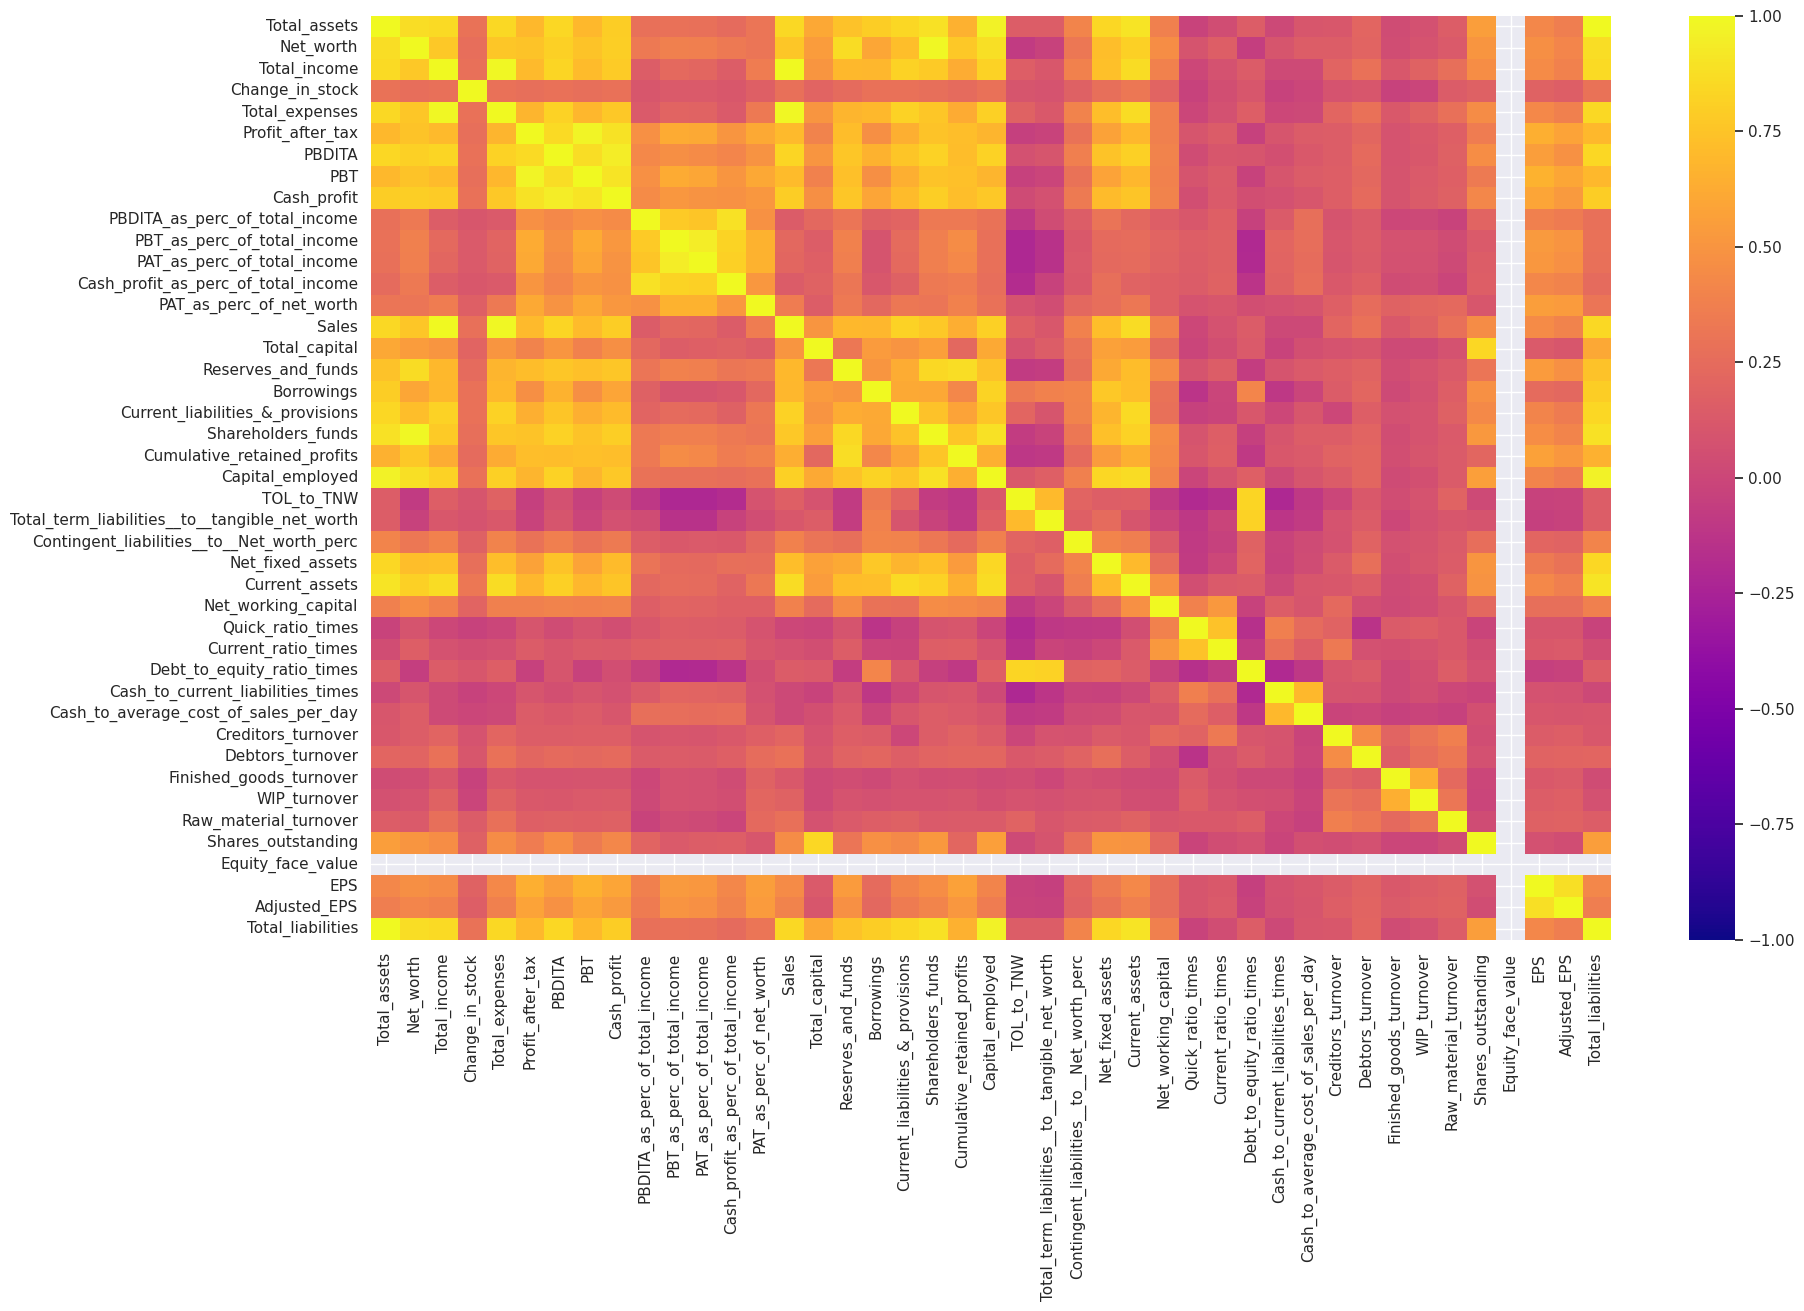

In [54]:
plt.figure(figsize=(20,12))
cor_matrix = company_imputed.drop('default',axis=1).corr()
sns.heatmap(cor_matrix,cmap='plasma', vmin=-1,vmax=1)
plt.show()

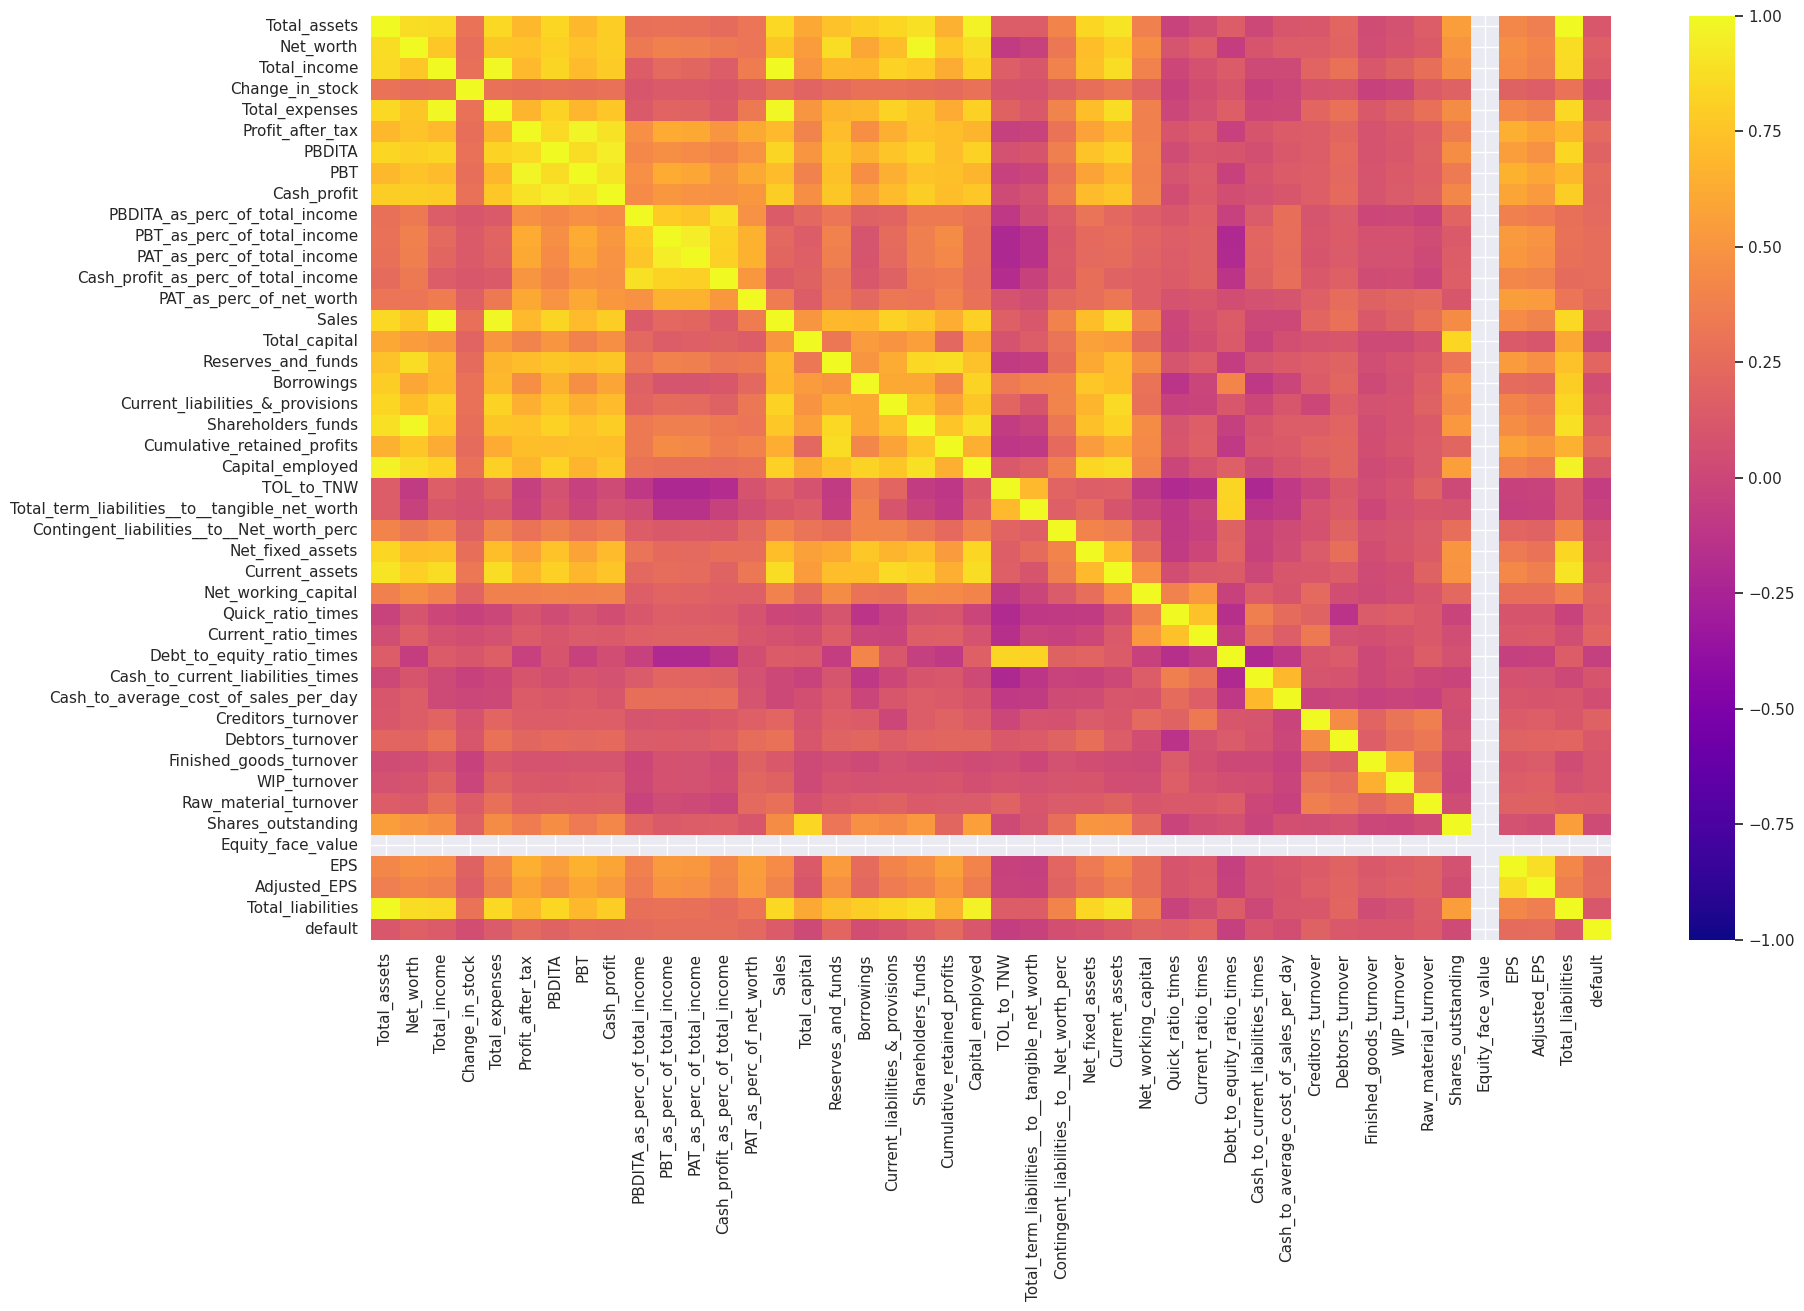

In [55]:
plt.figure(figsize=(20,12))
sns.heatmap(company_imputed.corr(),cmap='plasma', vmin=-1,vmax=1)
plt.show()

In [56]:
predictors = company_imputed.drop('default', axis=1)
response = company_imputed['default']

In [57]:
predictors.shape

(3541, 43)

In [58]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [60]:
# instead of PCA
# To have control of features slected or eliminated
from sklearn.feature_selection import RFE

In [61]:
x_train, x_test, y_train, y_test = train_test_split(predictors, response, test_size=0.25,
                                                    random_state=2, stratify=response)

In [62]:
### For modeling we will use LogisticRegression with RFE (recursive feature elimination)

In [63]:
LogR = LogisticRegression()

In [64]:
selector = RFE(estimator=LogR, n_features_to_select=15, step=1)

In [65]:
selector = selector.fit(x_train, y_train)

In [66]:
selector.n_features_

15

In [67]:
selector.ranking_

array([23, 28, 11,  1,  1,  6,  7,  5,  1,  1, 20,  1,  4, 19,  1,  2,  1,
        1, 13,  1,  1, 27, 18,  9, 26, 10, 12,  1, 22,  3,  8, 21, 24,  1,
       25,  1, 16, 15,  1, 29,  1, 14, 17])

In [68]:
df = pd.DataFrame({'feature': scaled_predictor.columns, 'Rank':selector.ranking_})
df[df['Rank']==1]

,feature,Rank
3,Change_in_stock,1
4,Total_expenses,1
8,Cash_profit,1
9,PBDITA_as_perc_of_total_income,1
11,PAT_as_perc_of_total_income,1
14,Sales,1
16,Reserves_and_funds,1
17,Borrowings,1
19,Shareholders_funds,1
20,Cumulative_retained_profits,1


<Axes: >

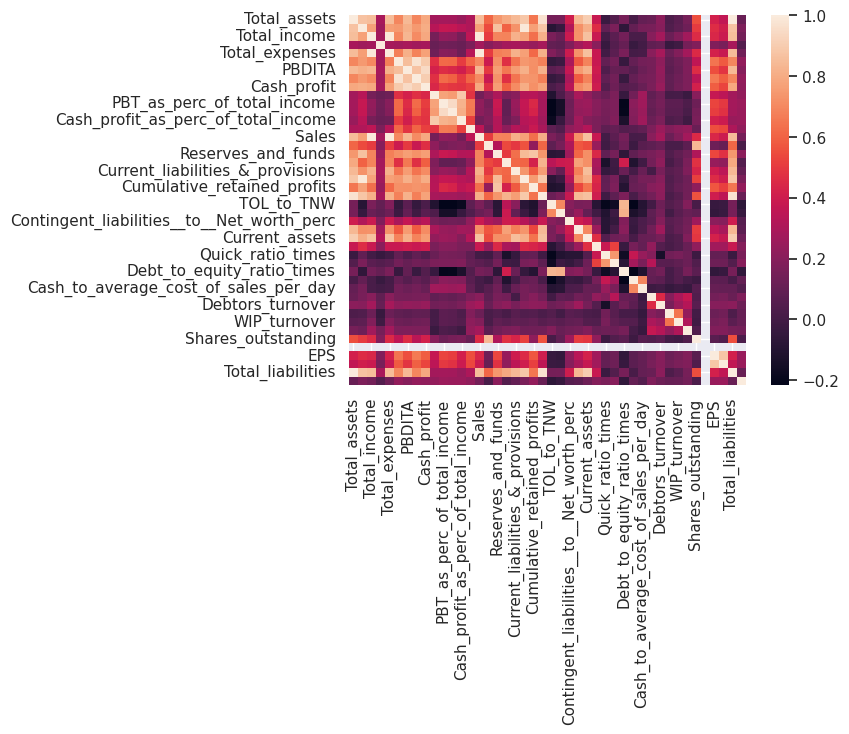

In [69]:
# correlation analysis
sns.heatmap(company_imputed.corr())

In [70]:
# second way of feature selection by finding correlation
df1 = company_imputed.corr()['default'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature',
                                                                                          'default': 'corr_coef'})
df1

,feature,corr_coef
0,Net_worth,0.169412
1,Total_income,0.144850
2,Change_in_stock,0.052899
3,Total_expenses,0.133263
4,Profit_after_tax,0.229265
5,PBDITA,0.194583
6,PBT,0.231517
7,Cash_profit,0.221389
8,PBDITA_as_perc_of_total_income,0.233115
9,PBT_as_perc_of_total_income,0.255265


In [71]:
# validating the model on train and test set

In [72]:
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score

In [73]:
pred_train = selector.predict(x_train)
pred_test = selector.predict(x_test)

In [74]:
print(confusion_matrix(y_train, pred_train))
print("****************"*10)
print(confusion_matrix(y_test, pred_test))


[[  42  140]
 [  18 2455]]
****************************************************************************************************************************************************************
[[ 14  47]
 [  9 816]]


In [78]:
print("Training Accuracy", accuracy_score(y_train, pred_train))
print("****************"*10)
print("Testing Accuracy", accuracy_score(y_test, pred_test))

Training Accuracy 0.9404896421845574
****************************************************************************************************************************************************************
Testing Accuracy 0.9367945823927766


In [77]:
print(classification_report(y_train, pred_train))
print("****************"*10)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.70      0.23      0.35       182
         1.0       0.95      0.99      0.97      2473

    accuracy                           0.94      2655
   macro avg       0.82      0.61      0.66      2655
weighted avg       0.93      0.94      0.93      2655

****************************************************************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.61      0.23      0.33        61
         1.0       0.95      0.99      0.97       825

    accuracy                           0.94       886
   macro avg       0.78      0.61      0.65       886
weighted avg       0.92      0.94      0.92       886



In [79]:
# we see poor recall for both train and test
response.value_counts(normalize=True)

,proportion
default,
1.0,0.931375
0.0,0.068625


In [80]:
# we see poor recall score for both train and test
# since only 7% of the total data had defaults (-1), we will try to balance the data before fitting the model

In [81]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33)
# to avoid leakage just using training data so that when test data comes its not exposed to training
x_sm, y_sm = sm.fit_resample(x_train, y_train)

In [82]:
y_train.value_counts(normalize=True)

,proportion
default,
1.0,0.93145
0.0,0.06855


In [83]:
y_sm.value_counts(normalize=True)

,proportion
default,
1.0,0.5
0.0,0.5


In [84]:
selector_smoter = selector.fit(x_sm,y_sm)

In [86]:
selector_smoter.n_features_

15

In [88]:
pred_train_smote = selector_smoter.predict(x_sm)
pred_test_smote = selector_smoter.predict(x_test)

In [90]:
print("Training Accuracy", accuracy_score(y_sm, pred_train_smote))
print("****************"*10)
print("Testing Accuracy", accuracy_score(y_test, pred_test_smote))

Training Accuracy 0.8677719369187222
****************************************************************************************************************************************************************
Testing Accuracy 0.809255079006772


In [91]:
print(classification_report(y_sm, pred_train_smote))
print("****************"*10)
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      2473
         1.0       0.91      0.81      0.86      2473

    accuracy                           0.87      4946
   macro avg       0.87      0.87      0.87      4946
weighted avg       0.87      0.87      0.87      4946

****************************************************************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.24      0.82      0.37        61
         1.0       0.98      0.81      0.89       825

    accuracy                           0.81       886
   macro avg       0.61      0.81      0.63       886
weighted avg       0.93      0.81      0.85       886



In [92]:
# Random forest classifier model

In [93]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()

In [94]:
select_rf = RFE(estimator=rforest, n_features_to_select=15, step=1)

In [95]:
select_rf = select_rf.fit(x_sm, y_sm)

In [96]:
pred_train_rf_smote = select_rf.predict(x_sm)
pred_test_rf_smote = select_rf.predict(x_test)

In [97]:
print("Training Accuracy", accuracy_score(y_sm, pred_train_rf_smote))
print("****************"*10)
print("Testing Accuracy", accuracy_score(y_test, pred_test_rf_smote))

Training Accuracy 1.0
****************************************************************************************************************************************************************
Testing Accuracy 0.9243792325056434


In [98]:
print(classification_report(y_sm, pred_train_rf_smote))
print("****************"*10)
print(classification_report(y_test, pred_test_rf_smote))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2473
         1.0       1.00      1.00      1.00      2473

    accuracy                           1.00      4946
   macro avg       1.00      1.00      1.00      4946
weighted avg       1.00      1.00      1.00      4946

****************************************************************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.47      0.66      0.54        61
         1.0       0.97      0.94      0.96       825

    accuracy                           0.92       886
   macro avg       0.72      0.80      0.75       886
weighted avg       0.94      0.92      0.93       886



In [99]:
# without smote
select_rf = select_rf.fit(x_train,y_train)

In [100]:
pred_train_rf = select_rf.predict(x_train)
pred_test_rf = select_rf.predict(x_test)

In [101]:
print("Training Accuracy", accuracy_score(y_train, pred_train_rf))
print("****************"*10)
print("Testing Accuracy", accuracy_score(y_test, pred_test_rf))

Training Accuracy 1.0
****************************************************************************************************************************************************************
Testing Accuracy 0.9480812641083521


In [102]:
print(classification_report(y_train, pred_train_rf))
print("****************"*10)
print(classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       182
         1.0       1.00      1.00      1.00      2473

    accuracy                           1.00      2655
   macro avg       1.00      1.00      1.00      2655
weighted avg       1.00      1.00      1.00      2655

****************************************************************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.70      0.43      0.53        61
         1.0       0.96      0.99      0.97       825

    accuracy                           0.95       886
   macro avg       0.83      0.71      0.75       886
weighted avg       0.94      0.95      0.94       886



In [103]:
# using cross validation appproach
from sklearn.model_selection import cross_val_score
training = cross_val_score(select_rf,x_train, y_train, cv=10)
print(training)
print("Average training accuracy",training.mean())
print("Maximum training accuract",training.max())

[0.94360902 0.94736842 0.94736842 0.94360902 0.94360902 0.94716981
 0.96603774 0.94716981 0.94716981 0.95849057]
Average training accuracy 0.9491601645623492
Maximum training accuract 0.9660377358490566
